In [3]:
import gdal
#from osgeo import gdal
from numpy import *

import matplotlib.pyplot as plt
%matplotlib inline

import rasterio
from rasterio import plot

from spectral import *
import spectral.io.envi

from rasterio.plot import show

In [4]:
%run filmstrip

ready...


In [5]:
import geopandas
og = geopandas.read_file("Non_Eucalyptus_Reg_Ecos/Non_Eucalypt_RE.shp")
ogm = geopandas.read_file("Monogenus_Monotribe_Eucalypt_Reg_Ecos_2017/Monotribe_Eucalypt_REs_2017_100pct.shp")
oge = geopandas.read_file("FF_SingleSp_RE_2017_V11.shp")

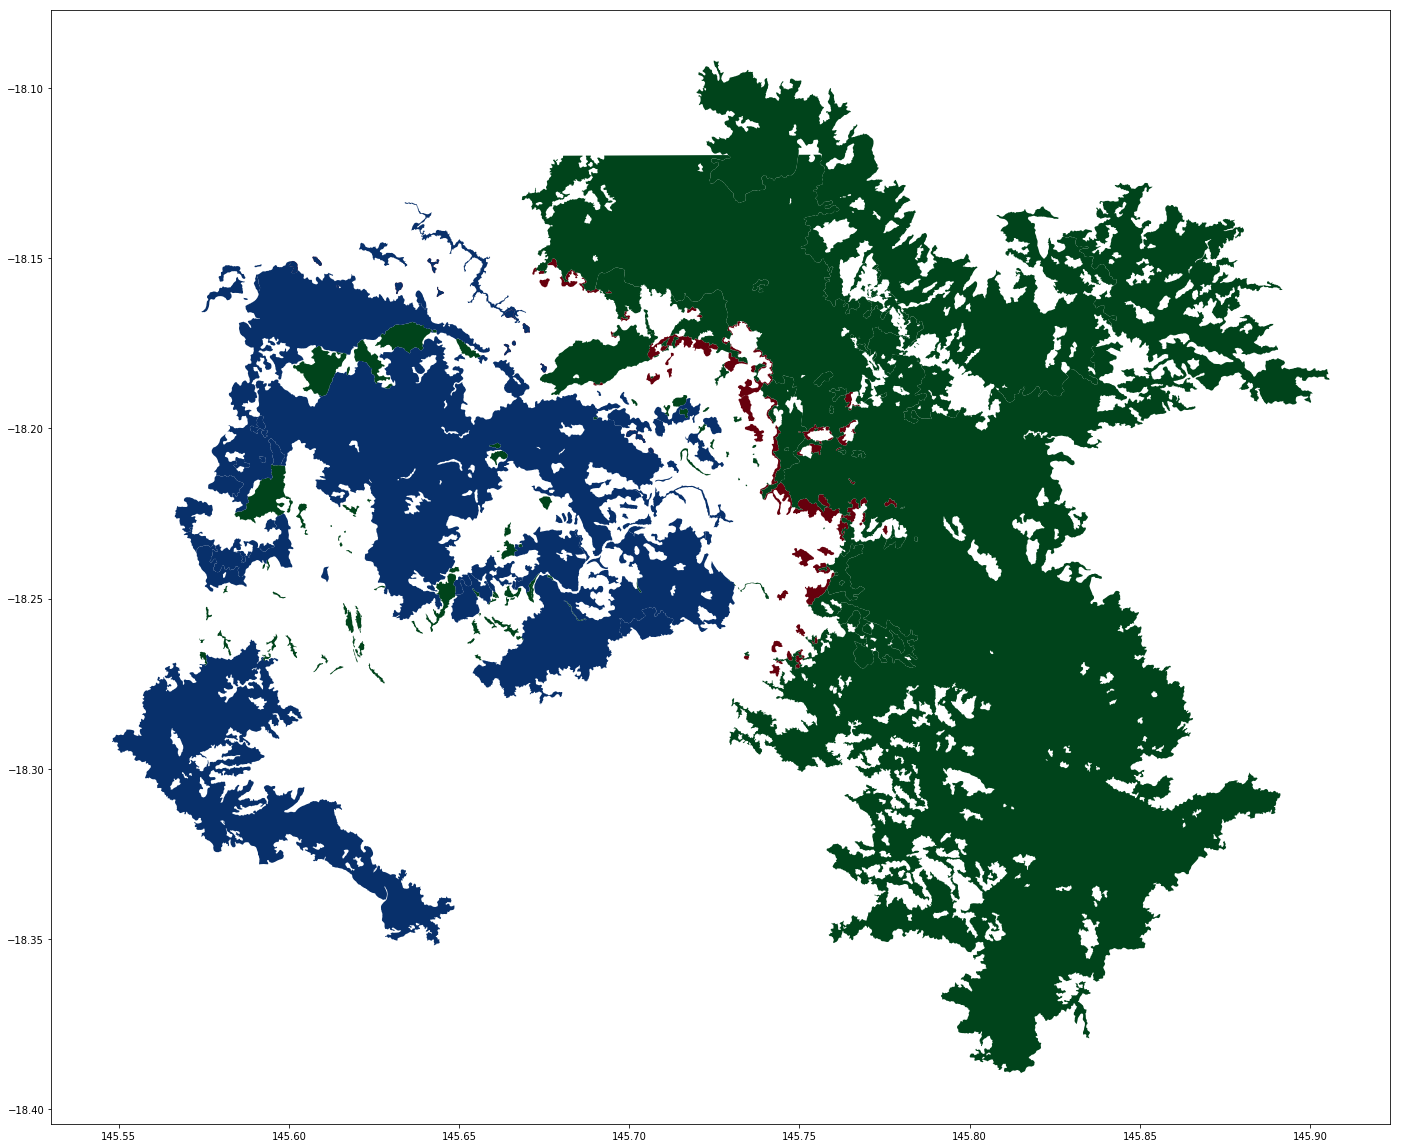

In [6]:
fg = 24

polygon2 = Polygon([
                    [145.5744, -18.27014],
                    [145.78456, -18.27014],
                    [145.78456, -18.1522],
                    [145.5744, -18.1522],
                    [145.5744, -18.27014]
                ])
subset2m = ogm[ogm.intersects(polygon2)]
subset2 = oge[oge.intersects(polygon2)]
subset2ne = og[og.intersects(polygon2)]
ax = subset2.plot(color='white',figsize=(fg,fg))

cmap_reds=plt.cm.get_cmap('Reds', 2)
cmap_blues=plt.cm.get_cmap('Blues', 2)
cmap_hot=plt.cm.get_cmap('Greens', 2)

subset2x = subset2
subset2x.plot(ax=ax,color=cmap_reds(2),figsize=(fg,fg))
        
subset2x = subset2ne
subset2x.plot(ax=ax,color=cmap_hot(2),figsize=(fg,fg))

subset2x = subset2m
subset2x.plot(ax=ax,color=cmap_blues(2),figsize=(fg,fg))

In [7]:
len(ogm)

34367

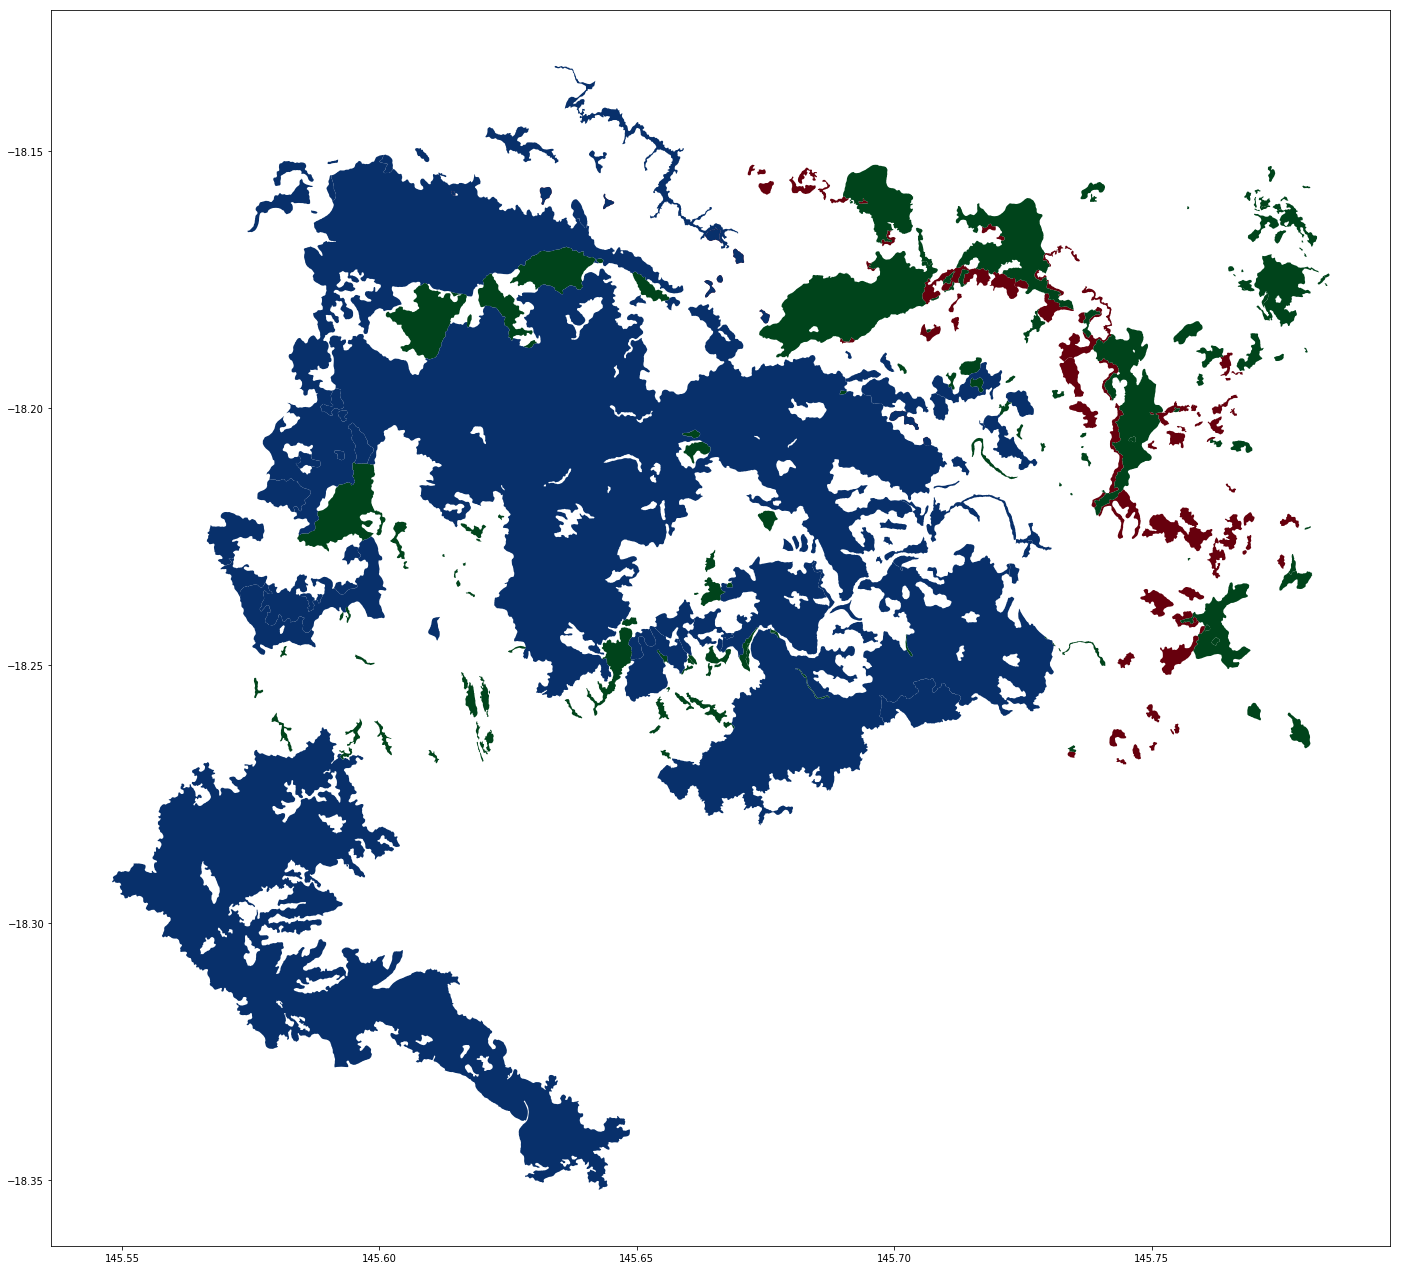

In [8]:
fg = 24

polygon2 = Polygon([
                    [145.5744, -18.27014],
                    [145.78456, -18.27014],
                    [145.78456, -18.1522],
                    [145.5744, -18.1522],
                    [145.5744, -18.27014]
                ])
subset2 = oge[oge.within(polygon2)]
subset2ne = og[og.within(polygon2)]
subset2m = ogm[ogm.intersects(polygon2)]
ax = subset2.plot(color='white',figsize=(fg,fg))

cmap_reds=plt.cm.get_cmap('Reds', 2)
cmap_hot=plt.cm.get_cmap('Greens', 2)
cmap_blues=plt.cm.get_cmap('Blues', 2)

subset2x = subset2
subset2x.plot(ax=ax,color=cmap_reds(2),figsize=(fg,fg))
        
subset2x = subset2ne
subset2x.plot(ax=ax,color=cmap_hot(2),figsize=(fg,fg))

subset2x = subset2m
subset2x.plot(ax=ax,color=cmap_blues(2),figsize=(fg,fg))

In [9]:
rpath= "/Users/brian/code/firedamage/zone1_2/b7009c0a-afb1-4906-afea-7a0b7e5858d6/3/files/"


stem = "LC08_L1TP_095073_20191016_20191029"
fntag = "zone1_2"
ls2envi_full(rpath,stem,fntag)

In [10]:
sds = gdal.Open("/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.tif")
driver = gdal.GetDriverByName('ENVI')
dst = driver.CreateCopy("/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.bil",sds)
dst = None
spy_image = envi.open("/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.hdr",
                      image="/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.bil")


ImageView object:
  Display bands       :  (3, 2, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 17378.0]
    G: [0.0, 14888.0]
    B: [0.0, 13703.0]

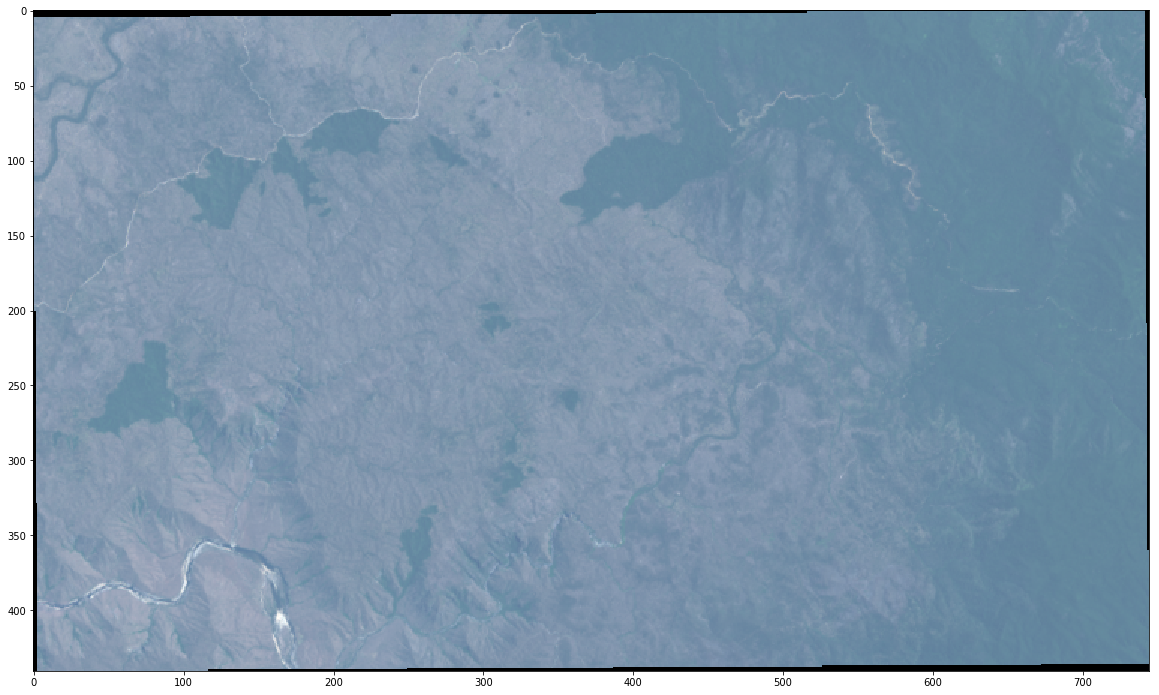

In [11]:
imshow(spy_image, (3,2,1), figsize=(20,20))

In [12]:
import geopandas
noneuc = geopandas.read_file("Non_Eucalyptus_Reg_Ecos/Non_Eucalypt_RE.shp")
euc = geopandas.read_file("FF_SingleSp_RE_2017_V11.shp")
ogm = geopandas.read_file("Monogenus_Monotribe_Eucalypt_Reg_Ecos_2017/Monotribe_Eucalypt_REs_2017_100pct.shp")

ucl = euc['QLD_REG_EC'].unique().tolist()
uclm = ogm['RE'].unique().tolist()

uclb = ucl + uclm

euco = {k: v for v, k in enumerate(ucl)} 

nonucl = noneuc['RE'].unique().tolist()
noneuco = {k: v for v, k in enumerate(nonucl)}

zg = {**euco, **noneuco}
import copy
zgz = copy.deepcopy(zg)
counter = 10
zk = list(zgz.keys())
for p in range(0,len(zgz)):
    zgz[zk[p]] = counter
    counter += 1

In [13]:
x = pd.read_csv("sub2polyNE.csv")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13,14,15,16,17,18,21,22,23,24,26,27,28,29,30,31,32,33,34,37,50,54,56,58,60,61,62,64,70,71,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
import geopandas
noneuc = geopandas.read_file("Non_Eucalyptus_Reg_Ecos/Non_Eucalypt_RE.shp")
euc = geopandas.read_file("FF_SingleSp_RE_2017_V11.shp")
ogm = geopandas.read_file("Monogenus_Monotribe_Eucalypt_Reg_Ecos_2017/Monotribe_Eucalypt_REs_2017_100pct.shp")
ogms = ogm[['RE', 'Descriptio', 'geometry']].copy()
noneucs = noneuc[['RE', 'Descriptio', 'geometry']].copy()
eucs = euc[['QLD_REG_EC','FF_singl_1','geometry']].copy()
eucs.rename(columns={'QLD_REG_EC': 'RE', 'FF_singl_1': 'Descriptio', 'geometry': 'geometry'}, inplace=True)
eucs['euc'] = 1
ogms['euc'] = 1
noneucs['euc'] = 0
merged = eucs.append(ogms,sort=False)
fpdf = merged.append(noneucs,sort=False)
len(fpdf)

112480

In [20]:
eucs['euc'] = 1
ogms['euc'] = 1
noneucs['euc'] = 0

In [21]:
eucs.head

<bound method NDFrame.head of            RE  Descriptio                                           geometry  \
0     11.5.9a      110509  POLYGON ((148.10641 -26.68966, 148.10508 -26.6...   
1     11.5.9a      110509  POLYGON ((148.07922 -26.68466, 148.07924 -26.6...   
2     11.5.9a      110509  POLYGON ((146.86591 -25.99768, 146.86650 -25.9...   
3     6.5.17a       60517  POLYGON ((148.32795 -28.32703, 148.32451 -28.3...   
4     6.5.17a       60517  POLYGON ((147.80093 -28.12636, 147.80133 -28.1...   
...       ...         ...                                                ...   
3206  7.3.42b       70342  POLYGON ((145.49075 -17.34959, 145.49107 -17.3...   
3207  7.3.42b       70342  POLYGON ((145.49427 -17.34437, 145.49435 -17.3...   
3208  7.8.15a       70815  POLYGON ((145.48660 -17.73448, 145.48704 -17.7...   
3209  7.8.15a       70815  POLYGON ((145.49096 -17.73240, 145.49117 -17.7...   
3210  7.8.15a       70815  POLYGON ((145.49038 -17.60238, 145.49024 -17.6...   

      euc

In [22]:
merged = eucs.append(ogms,sort=False)
fpdf = merged.append(noneucs,sort=False)

In [23]:
len(fpdf)

112480

In [24]:
fpdf.iloc[103000]['euc'] == 0

True

In [ ]:
fpdf.to_csv("allPolygonsMerged.csv")

In [6]:

data = pd.read_csv('allPolygonsMerged.csv')

In [25]:
%run create_training_polygons
hsf = "/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.tif"
#hnon = xkpls(hsf,spy_image,8,'sub2polyNE.csv',4326,4283,32654,0,535,0,7590,zgz)

#hnon = xkpls(hsf,spy_image,8,'sub2polyNE.csv',4326,4283,32655,0,441,0,745,zgz)

hnon = xkpls_m(hsf,spy_image,8,fpdf,4326,4283,32655,0,441,0,745,zgz)

ready...
------src.ref_____
+init=epsg:32655
---------lbrt-------------
349185.0 -2020665.0 371535.0 -2007435.0
---------spoly-------------
POLYGON ((349185 -2007435, 349185 -2020665, 371535 -2020665, 371535 -2007435, 349185 -2007435))
image pixel dimensions:
(441, 745, 12)
xpoly.bounds: (349185.0, -2020665.0, 371535.0, -2007435.0)
chd:13230.0 cwd:22350.0
poly number: 1
hits number: 337
4 of 337
9 of 337
14 of 337
19 of 337
24 of 337
29 of 337
34 of 337
39 of 337
44 of 337
49 of 337
54 of 337
59 of 337
64 of 337
69 of 337
74 of 337
79 of 337
84 of 337
89 of 337
94 of 337
99 of 337
104 of 337
109 of 337
114 of 337
119 of 337
124 of 337
129 of 337
134 of 337
139 of 337
144 of 337
149 of 337
154 of 337
159 of 337
164 of 337
169 of 337
174 of 337
179 of 337
184 of 337
189 of 337
194 of 337
199 of 337
204 of 337
209 of 337
214 of 337
219 of 337
224 of 337
229 of 337
234 of 337
239 of 337
244 of 337
249 of 337
254 of 337
259 of 337
264 of 337
269 of 337
274 of 337
279 of 337
284 of 337
289 o

In [7]:
len(data)

24996

In [38]:
type(hnon)
hnon.ndim
hnon.size
hnon.shape

(441, 745)

In [85]:
unique, counts = np.unique(hnon, return_counts=True)

In [86]:
unique

array([0., 2., 3.])

In [26]:

view = imshow(spy_image, (3, 2, 1), classes=hnon,figsize=(20,20))
view.set_display_mode('overlay')
view.class_alpha = 0.5

In [27]:
import spectral as spy
traint = spy.create_training_classes(spy_image,hnon)
gmlc1 = GaussianClassifier(traint)
clmap1 = gmlc1.classify_image(spy_image)
imshow(classes=clmap1,figsize=(20,20))
gtresultst1 = clmap1 * (hnon != 0)
v = imshow(classes=gtresultst1,figsize=(20,20))
training_errors2 = gtresultst1 * (gtresultst1 != hnon)
imshow(classes=training_errors2,figsize=(20,20))

Setting min samples to 12
Covariance.....  0.0%Covariance.....  0.0%Covariance.....done  
Covariance.....  0.0%Covariance.....  0.0%Covariance.....done  
Classifying image...  0.0%Classifying image...done  


ImageView object:
  Interpolation       :  <default>

In [89]:
import pandas as pd
hnf = hnon.flatten()
hnfnz = hnf[hnf != 0]
gnf = gtresultst1.flatten()
gnfnz = gnf[gnf != 0]

y_actu = pd.Series(hnfnz, name='Actual')
y_pred = pd.Series(gnfnz.flatten(), name='Predicted')
df_confusion_nz = pd.crosstab(y_actu, y_pred)

df_conf_norm = df_confusion_nz / df_confusion_nz.sum(axis=1)
df_conf_norm

Predicted         2         3
Actual                       
2.0        0.952423  0.067735
3.0        0.021002  0.970099

In [90]:
import sklearn
from sklearn import metrics
print("Cohen's Kappa:")
print(sklearn.metrics.cohen_kappa_score(y_actu, y_pred))
print("\nBalanced Accuracy:")
print(sklearn.metrics.balanced_accuracy_score(y_actu, y_pred))
print("\n")
print(sklearn.metrics.classification_report(y_actu, y_pred, digits=3))

Cohen's Kappa:
0.9173573894259937

Balanced Accuracy:
0.9612609637338574


              precision    recall  f1-score   support

         2.0      0.978     0.952     0.965    104798
         3.0      0.935     0.970     0.952     73610

    accuracy                          0.960    178408
   macro avg      0.957     0.961     0.959    178408
weighted avg      0.960     0.960     0.960    178408



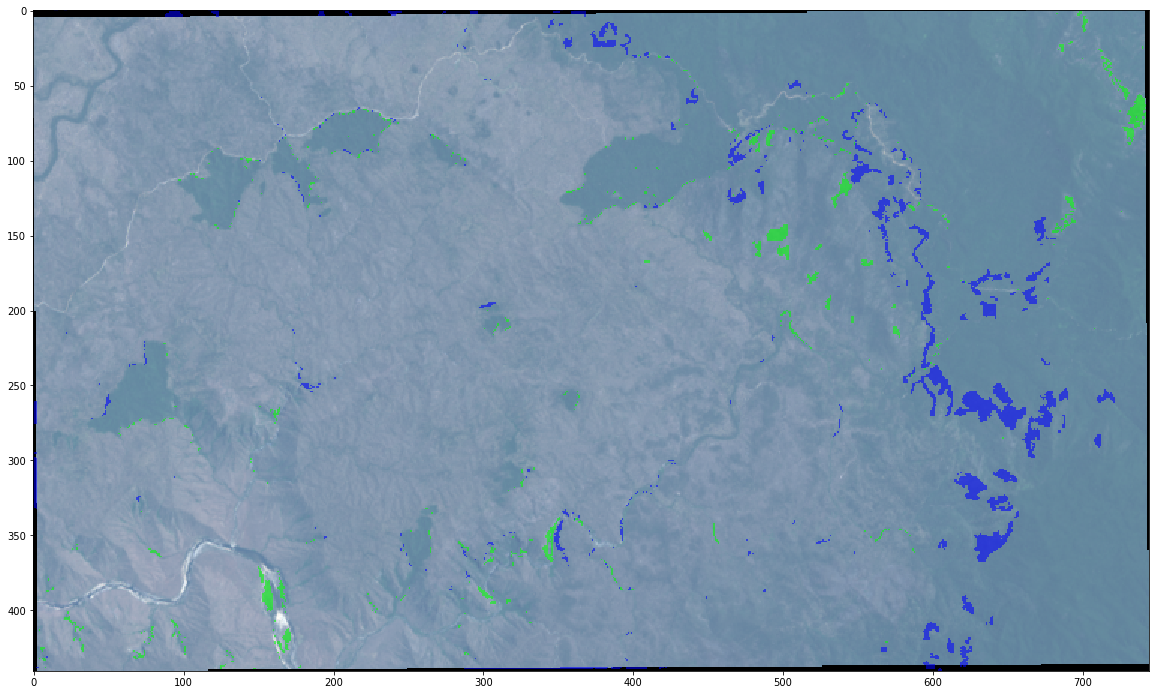

In [91]:

view = imshow(spy_image, (3, 2, 1), classes=training_errors2,figsize=(20,20))
view.set_display_mode('overlay')
view.class_alpha = 0.75

In [30]:
rpathd= "/Users/brian/code/firedamage/Danbulla1/a3697847-9819-47d7-b667-58e52236a785/1/files/"


stem = "LC08_L1TP_096072_20191108_20191115"
fntag = "danbulla"
ls2envi_full(rpathd,stem,fntag)

sdsd = gdal.Open("/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.tif")
driver = gdal.GetDriverByName('ENVI')
dst = driver.CreateCopy("/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.bil",sdsd)
dst = None
spy_imaged = envi.open("/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.hdr",
                      image="/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.bil")


In [33]:
%run create_training_polygons
hsf = "/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.tif"
#hnon = xkpls(hsf,spy_image,8,'sub2polyNE.csv',4326,4283,32654,0,535,0,7590,zgz)
hnon_dan = xkpls_m(hsf,spy_imaged,8,fpdf,4326,4283,32655,0,580,0,571,zgz)

ready...
------src.ref_____
+init=epsg:32655
---------lbrt-------------
347115.0 -1909545.0 364245.0 -1892145.0
---------spoly-------------
POLYGON ((347115 -1892145, 347115 -1909545, 364245 -1909545, 364245 -1892145, 347115 -1892145))
image pixel dimensions:
(580, 571, 12)
xpoly.bounds: (347115.0, -1909545.0, 364245.0, -1892145.0)
chd:17400.0 cwd:17130.0
poly number: 1
hits number: 402
4 of 402
9 of 402
14 of 402
19 of 402
24 of 402
29 of 402
34 of 402
39 of 402
44 of 402
49 of 402
54 of 402
59 of 402
64 of 402
69 of 402
74 of 402
79 of 402
84 of 402
89 of 402
94 of 402
99 of 402
104 of 402
109 of 402
114 of 402
119 of 402
124 of 402
129 of 402
134 of 402
139 of 402
144 of 402
149 of 402
154 of 402
159 of 402
164 of 402
169 of 402
174 of 402
179 of 402
184 of 402
189 of 402
194 of 402
199 of 402
204 of 402
209 of 402
214 of 402
219 of 402
224 of 402
229 of 402
234 of 402
239 of 402
244 of 402
249 of 402
254 of 402
259 of 402
264 of 402
269 of 402
274 of 402
279 of 402
284 of 402
289 o

In [39]:
fg = 24
import geopandas
og = geopandas.read_file("Non_Eucalyptus_Reg_Ecos/Non_Eucalypt_RE.shp")
ogo = geopandas.read_file("FF_SingleSp_RE_2017_V11.shp")
ogm = geopandas.read_file("Monogenus_Monotribe_Eucalypt_Reg_Ecos_2017/Monotribe_Eucalypt_REs_2017_100pct.shp")


polygon2 = Point(145.65, -17.18).buffer(0.1)
subset2 = ogo[ogo.within(polygon2)]
subset2ne = og[og.within(polygon2)]
ax = subset2.plot(color='white',figsize=(fg,fg))

cmap_reds=plt.cm.get_cmap('Reds', 2)
cmap_hot=plt.cm.get_cmap('Greens', 2)

subset2x = subset2
subset2x.plot(ax=ax,color=cmap_reds(2),figsize=(fg,fg))
        
subset2x = subset2ne
subset2x.plot(ax=ax,color=cmap_hot(2),figsize=(fg,fg))

Setting min samples to 12
Classifying image...  0.0%Classifying image...done  


ImageView object:
  Interpolation       :  <default>

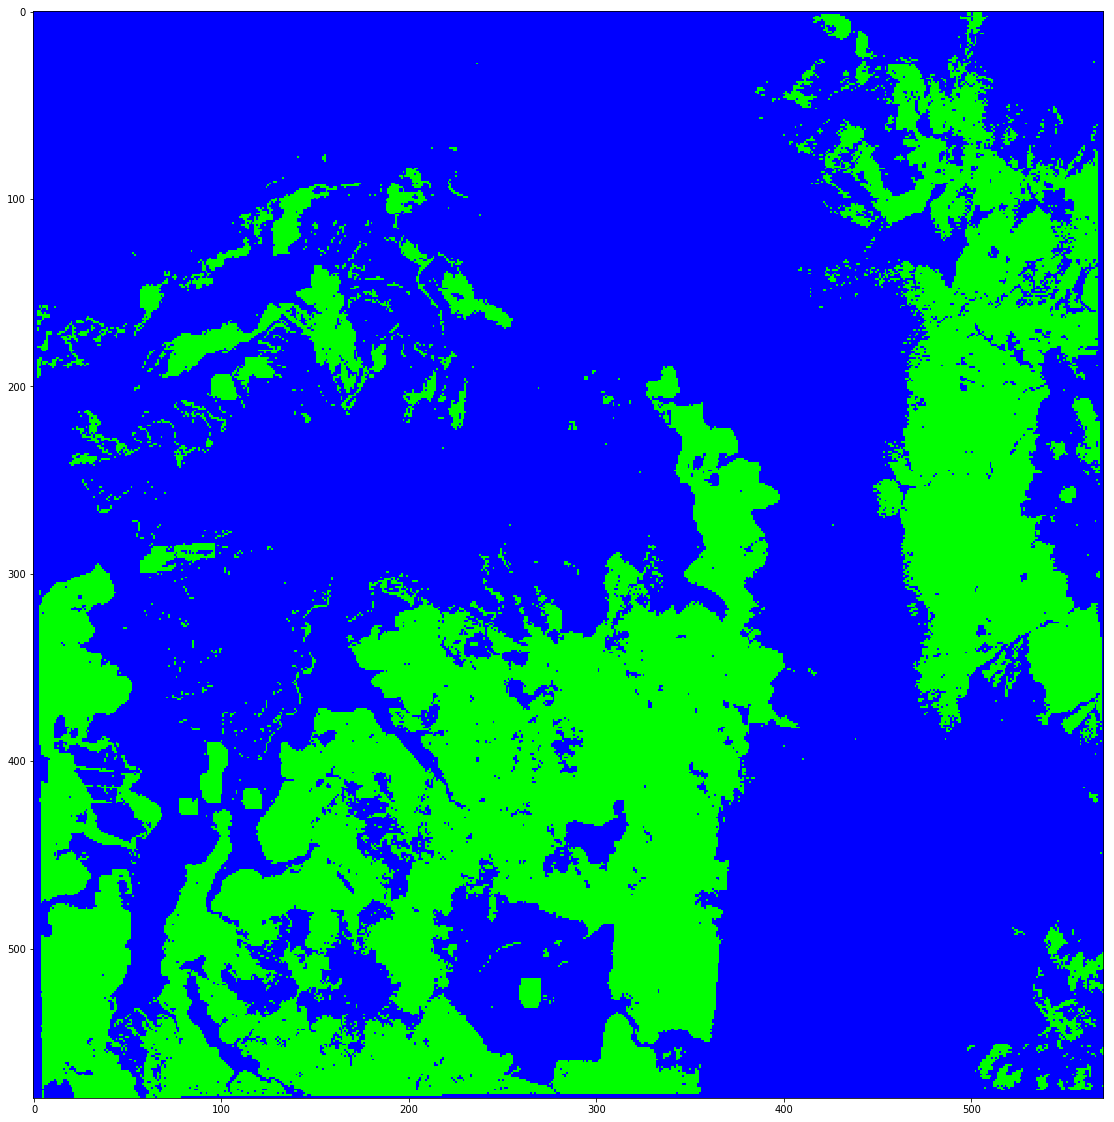

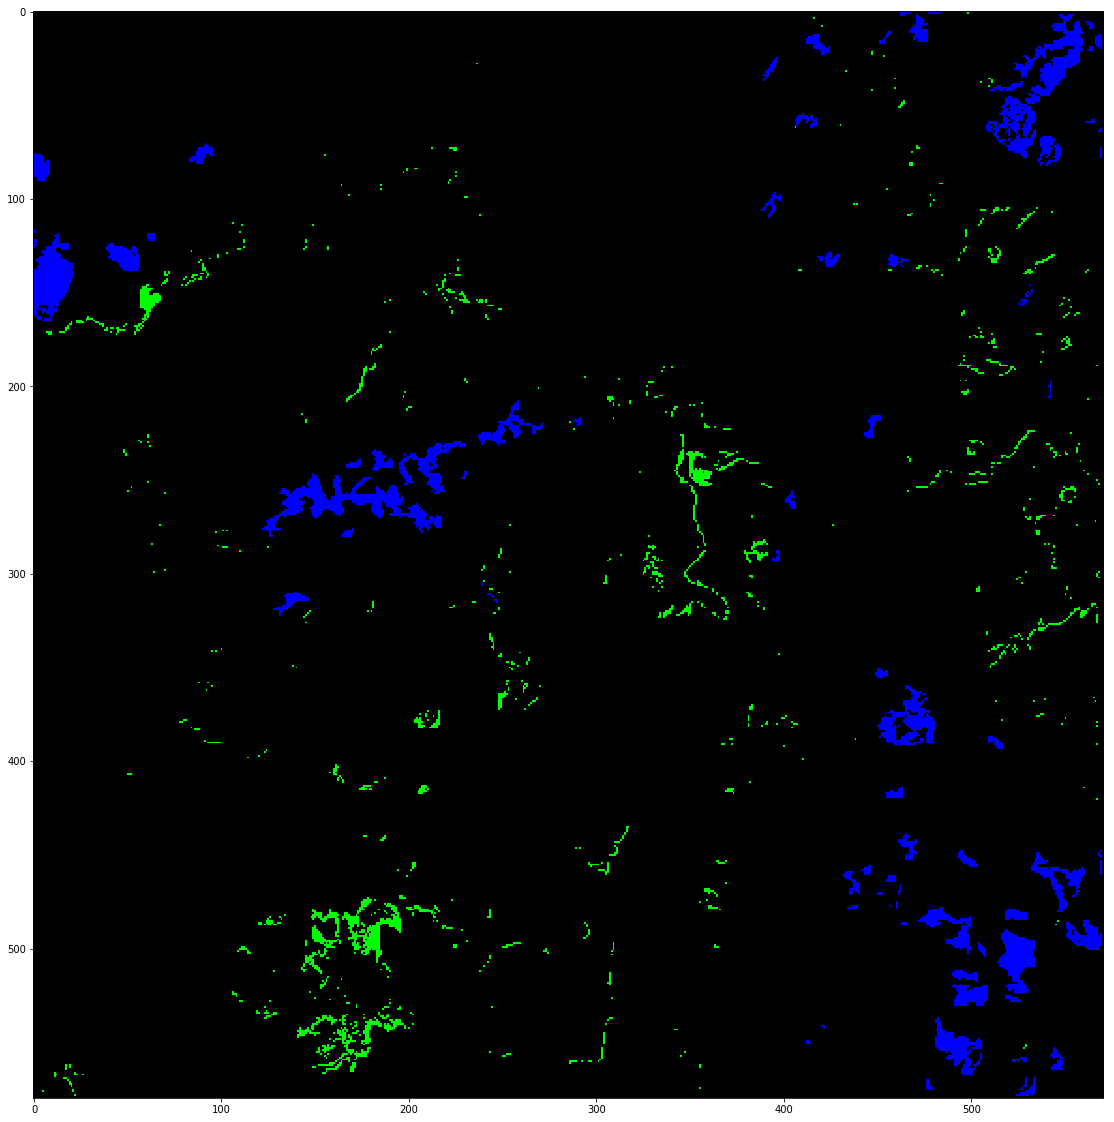

In [34]:
import spectral as spy
#traintd = spy.create_training_classes(spy_imaged,hnon)
gmlc1d = GaussianClassifier(traint)
clmap1d = gmlc1d.classify_image(spy_imaged)
imshow(classes=clmap1d,figsize=(20,20))
gtresultst1d = clmap1d * (hnon_dan != 0)
v = imshow(classes=gtresultst1d,figsize=(20,20))
training_errors2d = gtresultst1d * (gtresultst1d != hnon_dan)
imshow(classes=training_errors2d,figsize=(20,20))

In [36]:
import pandas as pd
hnf = hnon_dan.flatten()
hnfnz = hnf[hnf != 0]
gnf = gtresultst1d.flatten()
gnfnz = gnf[gnf != 0]

y_actu = pd.Series(hnfnz, name='Actual')
y_pred = pd.Series(gnfnz.flatten(), name='Predicted')
df_confusion_nz = pd.crosstab(y_actu, y_pred)

df_conf_norm = df_confusion_nz / df_confusion_nz.sum(axis=1)
df_conf_norm

Predicted         2         3
Actual                       
2.0        0.023528  0.046954
3.0        0.429135  0.979365

In [37]:
import sklearn
from sklearn import metrics
print("Cohen's Kappa:")
print(sklearn.metrics.cohen_kappa_score(y_actu, y_pred))
print("\nBalanced Accuracy:")
print(sklearn.metrics.balanced_accuracy_score(y_actu, y_pred))
print("\n")
print(sklearn.metrics.classification_report(y_actu, y_pred, digits=3))

Cohen's Kappa:
0.0039119562140094155

Balanced Accuracy:
0.5014464275840881


              precision    recall  f1-score   support

         2.0      0.052     0.024     0.032      7098
         3.0      0.954     0.979     0.967    147614

    accuracy                          0.936    154712
   macro avg      0.503     0.501     0.500    154712
weighted avg      0.913     0.936     0.924    154712



In [92]:
    def classify_image_wp(self, image):
        '''Classifies an entire image, returning a classification map.
        Arguments:
            `image` (ndarray or :class:`spectral.Image`)
                The `MxNxB` image to classify.
        Returns (ndarray):
            An `MxN` ndarray of integers specifying the class for each pixel.
        '''
        import math
        import spectral
        self.cache_class_scores = True
        #if not (self.cache_class_scores and isinstance(image, np.ndarray)):
        #    return super(GaussianClassifier, self).classify_image(image)

        status = spectral._status
        status.display_percentage('Processing...')
        shape = image.shape
        image = image.reshape(-1, shape[-1])
        scores = np.empty((image.shape[0], len(self.classes)), np.float64)
        delta = np.empty_like(image, dtype=np.float64)

        # For some strange reason, creating Y with np.emtpy_like will sometimes
        # result in the following error when attempting an in-place np.dot:
        #     ValueError: output array is not acceptable (must have the right
        #     type, nr dimensions, and be a C-Array)
        # It appears that this may be happening when delta is not contiguous,
        # although it isn't clear why the alternate construction of Y below
        # does work.
        Y = np.empty_like(delta)

        for (i, c) in enumerate(self.classes):
            scalar = math.log(c.class_prob) - 0.5 * c.stats.log_det_cov
            delta = np.subtract(image, c.stats.mean, out=delta)
            try:
                Y = delta.dot(-0.5 * c.stats.inv_cov, out=Y)
            except:
                # Unable to output np.dot to existing array. Allocate new
                # storage instead. This will not affect results but may be
                # slower.
                Y = delta.dot(-0.5 * c.stats.inv_cov)
            scores[:, i] = np.einsum('ij,ij->i', Y, delta)
            scores[:, i] += scalar
            print(scores.shape)
            status.update_percentage(100. * (i + 1) / len(self.classes))
            print(c)
        status.end_percentage()
        inds = np.array([c.index for c in self.classes], dtype=np.int16)
        mins = np.argmax(scores, axis=-1)
        #return inds[mins].reshape(shape[:2])
        return scores

In [93]:
    def classify_spectrum_ws(self, x):
        '''
        Classifies a pixel into one of the trained classes.
        Arguments:
            `x` (list or rank-1 ndarray):
                The unclassified spectrum.
        Returns:
            `classIndex` (int):
                The index for the :class:`~spectral.algorithms.TrainingClass`
                to which `x` is classified.
        '''
        from math import log

        scores = np.empty(len(self.classes))
        for (i, cl) in enumerate(self.classes):
            delta = (x - cl.stats.mean)
            scores[i] = log(cl.class_prob) - 0.5 * cl.stats.log_det_cov \
               - 0.5 * delta.dot(cl.stats.inv_cov).dot(delta)
        #return self.classes[np.argmax(scores)].index
        return scores

In [94]:
import spectral# as spy
image = spy_image
#from spy.algorithms import ImageIterator
from numpy import zeros
status = spectral._status
status.display_percentage('Classifying image...')
it = spectral.algorithms.ImageIterator(image)
class_map = zeros(image.shape[:2], np.int16)
score_map1 = zeros(image.shape[:2], np.int16)
score_map2 = zeros(image.shape[:2], np.int16)
#score_map3 = zeros(image.shape[:2], np.int16)
N = it.get_num_elements()
i, inc = (0, N / 100)
storn = []
storner = []
for spectrum in it:
    #print(classify_spectrum_ws(gmlcwp8,spectrum))
    stor = classify_spectrum_ws(gmlc1,spectrum)
    
    if not i % 100000:
        print(stor)
    #class_map[it.row, it.col] = classify_spectrum_ws(gmlcwp8,spectrum)
    score_map1[it.row, it.col] = stor[0]
    score_map2[it.row, it.col] = stor[1]
    #score_map3[it.row, it.col] = stor[2]
    storx = [0,0,0]
    storx[0] = abs(stor[0])
    storx[1] = abs(stor[1])
    #storx[2] = abs(stor[2])
    storn.append(storx)
    storcx = [0,0,0,0]
    storcx[0] = abs(stor[0])
    storcx[1] = abs(stor[1])
    storcx[2] = it.row
    storcx[3] = it.col
    storner.append(storcx)
    i += 1
    if not i % inc:
        status.update_percentage(float(i) / N * 100.)
        status.end_percentage()

Classifying image...  0.0%[-178.09442336  -90.78420737]
[-62.90632816 -91.88511797]
[-61.63152027 -97.03465545]
[-66.92997108 -75.53958303]


In [95]:
x = abs(score_map2 - score_map1)
xx = x

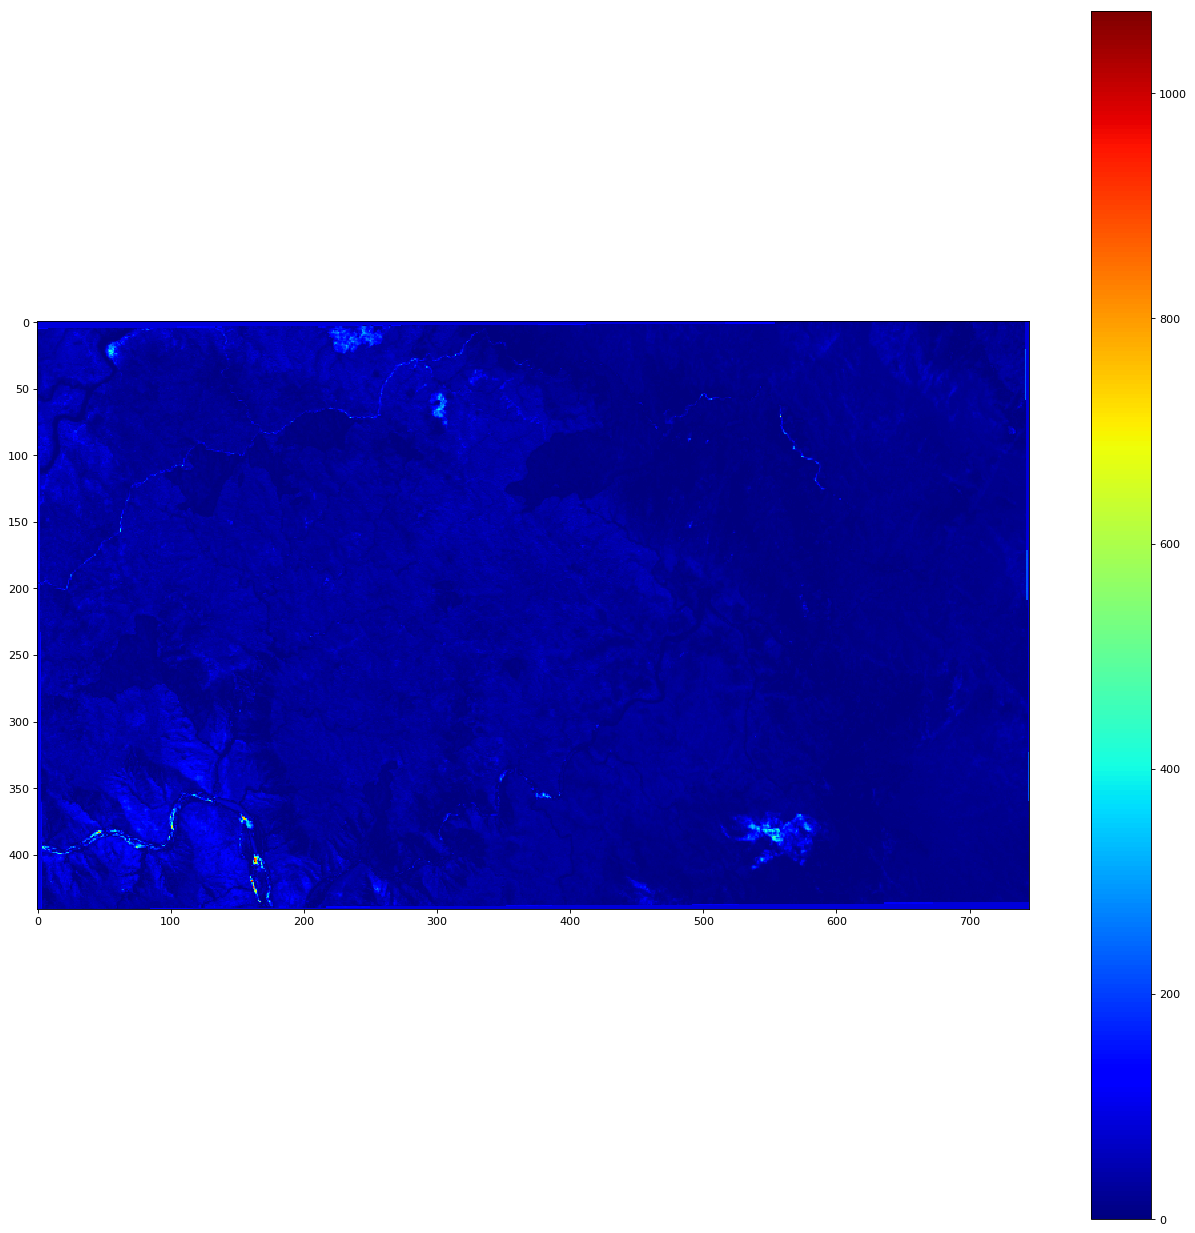

In [96]:
plt.set_cmap('jet')
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(xx)
plt.colorbar()
plt.show()

In [97]:
xx = zeros(spy_image.shape[:2], np.int16)
for i in range(0,spy_image.shape[0]):
    for j in range(0,spy_image.shape[1]):
        if(x[i][j]<100.0):
            xx[i][j] = x[i][j]
        else:
            xx[i][j] = 100.0

In [98]:
spy_image.shape

(441, 745, 12)

In [99]:
plt.set_cmap('jet')
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(xx)
plt.colorbar()
plt.show()

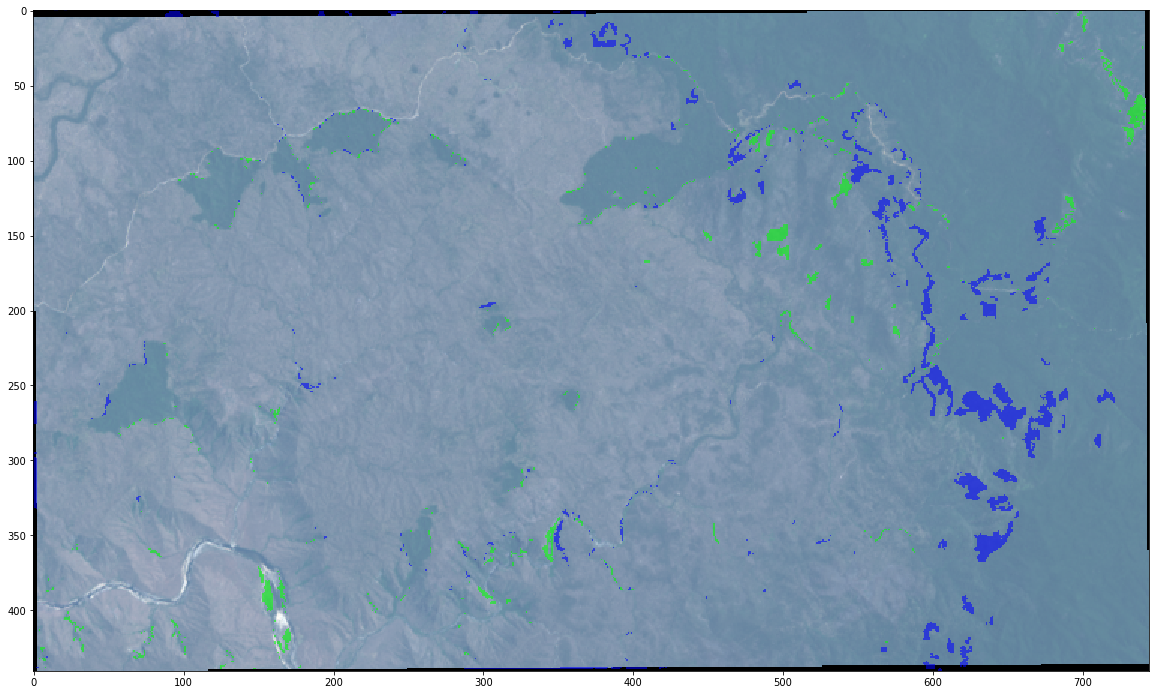

In [100]:
view = imshow(spy_image, (3, 2, 1), classes=training_errors2,figsize=(20,20))
view.set_display_mode('overlay')
view.class_alpha = 0.75

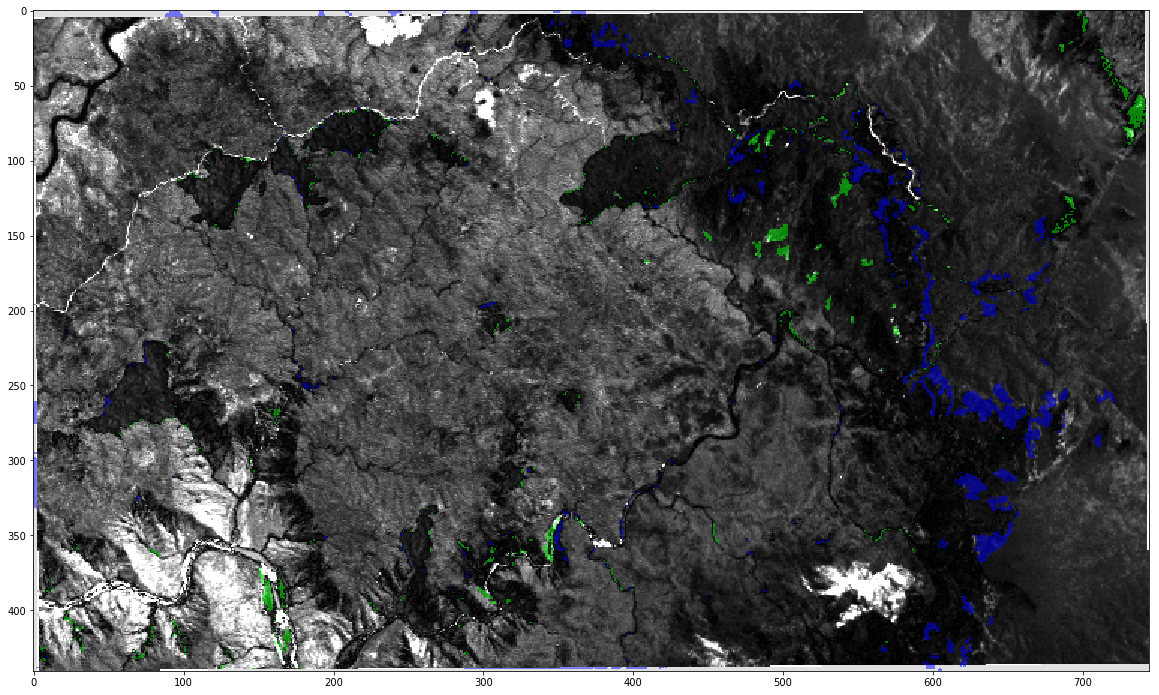

In [101]:
view = imshow(xx, (0, 0, 0), classes=training_errors2,figsize=(20,20))
view.set_display_mode('overlay')
view.class_alpha = 0.7

In [102]:
d = zeros(spy_image.shape[:2], np.int16)
for i in range(0,spy_image.shape[0]):
    for j in range(0,spy_image.shape[1]):
        if(x[i][j]<10.0):
            d[i][j] = x[i][j]
        else:
            d[i][j] = 10.0

In [103]:
view = imshow(d, (0, 0, 0), classes=training_errors2,figsize=(20,20))
view.set_display_mode('overlay')
view.class_alpha = 0.8

In [104]:
p = x.flatten()

In [105]:
p

array([88, 88, 88, ..., 88, 88, 88], dtype=int16)

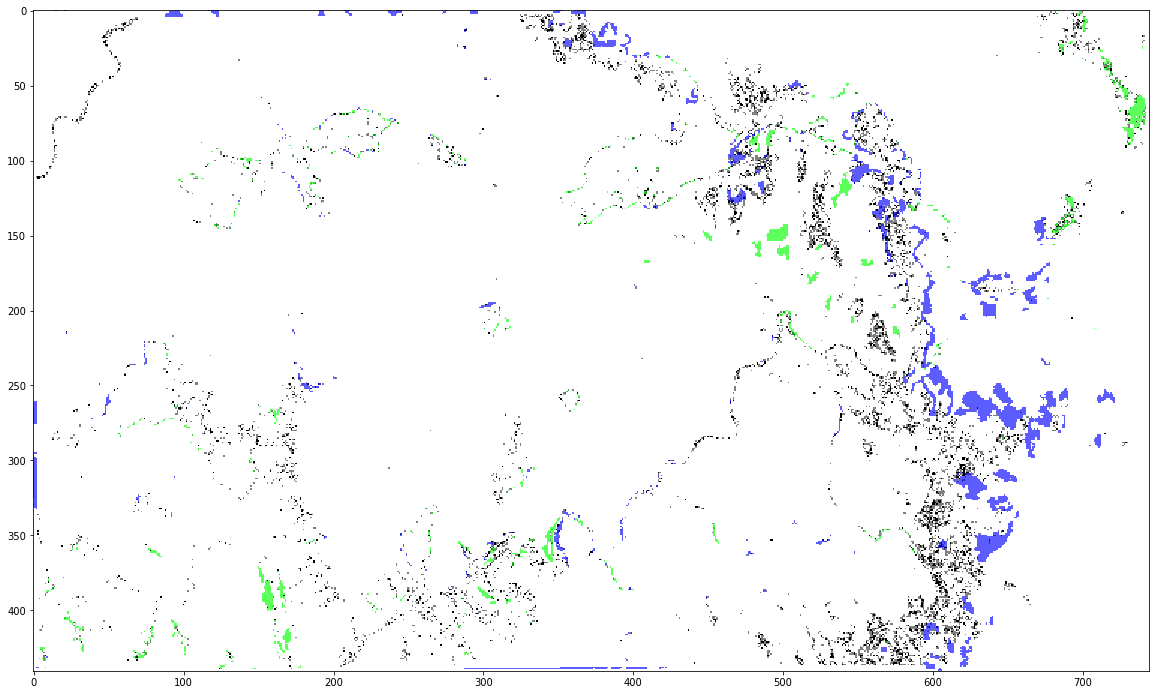

In [106]:
d = zeros(spy_image.shape[:2], np.int16)
for i in range(0,spy_image.shape[0]):
    for j in range(0,spy_image.shape[1]):
        if(x[i][j]<2.0):
            d[i][j] = x[i][j]
        else:
            d[i][j] = 2.0
            
view = imshow(d, (0, 0, 0), classes=training_errors2,figsize=(20,20))
view.set_display_mode('overlay')
view.class_alpha = 0.8

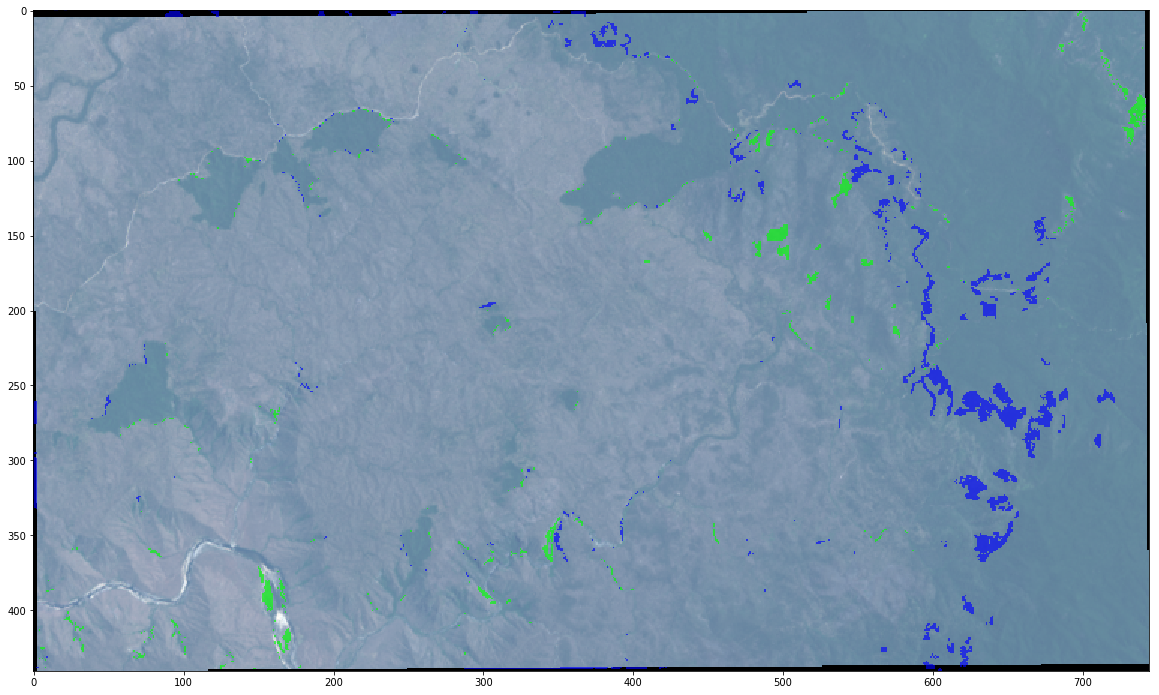

In [107]:
d = zeros(spy_image.shape[:2], np.int16)
for i in range(0,spy_image.shape[0]):
    for j in range(0,spy_image.shape[1]):
        if(training_errors2[i][j] != 0):
            if(x[i][j]>2.0):
                d[i][j] = training_errors2[i][j]

            
view = imshow(spy_image, (3, 2, 1), classes=d,figsize=(20,20))
view.set_display_mode('overlay')
view.class_alpha = 0.8

In [109]:

rdf = pd.DataFrame(columns=['cutoff', 'kappa', 'accuracy','pixels_proportion_excluded'])
d = np.copy(gtresultst1)
dz = zeros((441, 745))
hnf = hnon.flatten()
hnfnz = hnf[hnf != 0]
y_actu = pd.Series(hnfnz.flatten(), name='Actual')

for pcutoff in range(0,40):
    cutoff = 0.0 + (pcutoff * 0.1)
    d = np.copy(gtresultst1)
    ds = 0
    for i in range(0,spy_image.shape[0]):
        #print(i)
        #print(ds)
        for j in range(0,spy_image.shape[1]):
            #if(training_errors2[i][j] != 0):
            if(x[i][j]<cutoff):
                    ds += 1
                    d[i][j] = hnon[i][j]

    #print(pcutoff)
    #print(cutoff)
    #print(f"sd:{ds}")
    #training_errors3 = d * (d != hnon)
    #view = imshow(spy_image, (3, 2, 1), classes=training_errors3,figsize=(20,20))
    #view.set_display_mode('overlay')
    #view.class_alpha = 0.8
    gnf = d.flatten()
    gnfnz = gnf[gnf != 0]
    y_pred = pd.Series(gnfnz.flatten(), name='Predicted')
    df_confusion_nz = pd.crosstab(y_actu, y_pred)
    df_conf_norm = df_confusion_nz / df_confusion_nz.sum(axis=1)
    #print(cutoff)
    kappa = sklearn.metrics.cohen_kappa_score(y_actu, y_pred)
    accu = sklearn.metrics.balanced_accuracy_score(y_actu, y_pred)
    rdf = rdf.append({
     "cutoff": cutoff,
     "kappa":  kappa,
        "accuracy": accu,
        "pixels_proportion_excluded": ds / 328545
      }, ignore_index=True)

In [110]:
rdf

cutoff     kappa  accuracy  pixels_proportion_excluded
0      0.0  0.917357  0.961261                    0.000000
1      0.1  0.919507  0.962339                    0.008437
2      0.2  0.919507  0.962339                    0.008437
3      0.3  0.919507  0.962339                    0.008437
4      0.4  0.919507  0.962339                    0.008437
5      0.5  0.919507  0.962339                    0.008437
6      0.6  0.919507  0.962339                    0.008437
7      0.7  0.919507  0.962339                    0.008437
8      0.8  0.919507  0.962339                    0.008437
9      0.9  0.919507  0.962339                    0.008437
10     1.0  0.919507  0.962339                    0.008437
11     1.1  0.923974  0.964549                    0.025573
12     1.2  0.923974  0.964549                    0.025573
13     1.3  0.923974  0.964549                    0.025573
14     1.4  0.923974  0.964549                    0.025573
15     1.5  0.923974  0.964549                    0.025573
16     1.6  0.923974  0.964549                    0.025573
17     1.7  0.923974  0.964549                    0.025573
18     1.8  0.923974  0.964549                    0.025573
19     1.9  0.923974  0.964549                    0.025573
20     2.0  0.923974  0.964549                    0.025573
21     2.1  0.928850  0.966848                    0.043200
22     2.2  0.928850  0.966848                    0.043200
23     2.3  0.928850  0.966848                    0.043200
24     2.4  0.928850  0.966848                    0.043200
25     2.5  0.928850  0.966848                    0.043200
26     2.6  0.928850  0.966848                    0.043200
27     2.7  0.928850  0.966848                    0.043200
28     2.8  0.928850  0.966848                    0.043200
29     2.9  0.928850  0.966848                    0.043200
30     3.0  0.928850  0.966848                    0.043200
31     3.1  0.934099  0.969260                    0.061614
32     3.2  0.934099  0.969260                    0.061614
33     3.3  0.934099  0.969260                    0.061614
34     3.4  0.934099  0.969260                    0.061614
35     3.5  0.934099  0.969260                    0.061614
36     3.6  0.934099  0.969260                    0.061614
37     3.7  0.934099  0.969260                    0.061614
38     3.8  0.934099  0.969260                    0.061614
39     3.9  0.934099  0.969260                    0.061614